<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/Group3_Tutorial1_CodeImplementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

 Angie.ipynb
"Angie's - Group3_Tutorial1_CodeImplementation-1.ipynb"
'AT2 Prezzo.gslides'
'Copy of Group3_Tutorial1_CodeImplementation-1 (1).ipynb'
'Copy of Group3_Tutorial1_CodeImplementation-1 (2).ipynb'
'Copy of Group3_Tutorial1_CodeImplementation-1.ipynb'
 desktop.ini
 Group3_Tutorial1_CodeImplementation-1.ipynb
 Harris.ipynb
'IDS Prezzo Pretty.pptx'
 Isaac.ipynb
 KDDTest+.csv
 KDDTrain+.csv
 mergeNotebooks.ipynb
'Sams Copy of Group3_Tutorial1_CodeImplementation-1.ipynb'
 Samuel.ipynb
 Test_data.csv
 Timothy.ipynb
 Train_data.csv


## Import necessary libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC
# DT
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

## KDD Data

In [51]:
KDD_Train = pd.read_csv('KDDTrain+.csv')
KDD_Test = pd.read_csv('KDDTest+.csv')
KDD_Train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [52]:
KDD_Test.columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'])
KDD_Train.columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'])

# Preprocessing

In [53]:
total_rows = len(KDD_Train)

missing_values = KDD_Train.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [54]:
for column in KDD_Train.columns:
    print(f"Counts for {column}:")
    print(KDD_Train[column].value_counts())
    print("------------")

Counts for duration:
duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
14642         1
5037          1
1500          1
14098         1
626           1
Name: count, Length: 2981, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
------------
Counts for service:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
------------
Counts for flag:
flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        49392
8         3691
1         2432
44        2334


In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Define the desired order of categories, i.e. not alphabetical
desired_categories = ['tcp', 'udp', 'icmp']

# Assuming KDD_Train and KDD_Test are your DataFrames
# If not, replace them with your actual DataFrames

# Perform one-hot encoding
onehot = OneHotEncoder(categories=[desired_categories], dtype=int, sparse=False)
kdd_train_encoded = onehot.fit_transform(KDD_Train[['protocol_type']])
kdd_test_encoded = onehot.fit_transform(KDD_Test[['protocol_type']])

# Convert the one-hot encoded arrays back to DataFrames
kdd_train_encoded_df = pd.DataFrame(kdd_train_encoded, columns=[f'protocol_type_{cat}' for cat in desired_categories])
kdd_test_encoded_df = pd.DataFrame(kdd_test_encoded, columns=[f'protocol_type_{cat}' for cat in desired_categories])

# Concatenate the original DataFrames with the encoded columns
KDD_Train_encoded = pd.concat([KDD_Train, kdd_train_encoded_df], axis=1)
KDD_Test_encoded = pd.concat([KDD_Test, kdd_test_encoded_df], axis=1)

# Drop the original 'protocol_type' column since it's now encoded
KDD_Train_encoded.drop('protocol_type', axis=1, inplace=True)
KDD_Test_encoded.drop('protocol_type', axis=1, inplace=True)

# Move 'attack' and 'level' columns to the end
KDD_Train_encoded = KDD_Train_encoded.reindex(columns=[col for col in KDD_Train_encoded.columns if col not in ['attack', 'level']] + ['attack', 'level'])
KDD_Test_encoded = KDD_Test_encoded.reindex(columns=[col for col in KDD_Test_encoded.columns if col not in ['attack', 'level']] + ['attack', 'level'])

# Check the first few rows of the updated DataFrames
KDD_Train_encoded


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,normal,15
1,0,private,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,19
2,0,http,SF,232,8153,0,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,1,0,0,normal,21
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1,0,0,normal,21
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,0.00,1.00,1.00,1,0,0,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,20
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,normal,21
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.00,0.72,0.00,0.01,0.00,1,0,0,normal,18
125970,0,klogin,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,20


In [56]:
attack_groups = {
    'DoS': ['neptune', 'smurf', 'teardrop', 'pod', 'land', 'back'],
    'probe_attack': ['satan', 'ipsweep', 'portsweep', 'nmap'],
    'unauthorised': ['guess_passwd', 'imap', 'multihop', 'phf', 'spy'],
    'malware': ['warezclient', 'buffer_overflow', 'warezmaster', 'rootkit', 'loadmodule', 'perl', 'ftp_write'],
    'normal': ['normal']
}

def categorize_attack(attack):
    for group, attacks in attack_groups.items():
        if attack in attacks:
            return group

KDD_Train_encoded['attack_group'] = KDD_Train_encoded['attack'].apply(categorize_attack)
KDD_Test_encoded['attack_group'] = KDD_Test_encoded['attack'].apply(categorize_attack)

KDD_Train_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,15,normal
1,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,19,DoS
2,0,http,SF,232,8153,0,0,0,0,0,...,0.03,0.01,0.00,0.01,1,0,0,normal,21,normal
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1,0,0,normal,21,normal
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,1,0,0,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,DoS
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,21,normal
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.72,0.00,0.01,0.00,1,0,0,normal,18,normal
125970,0,klogin,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,DoS


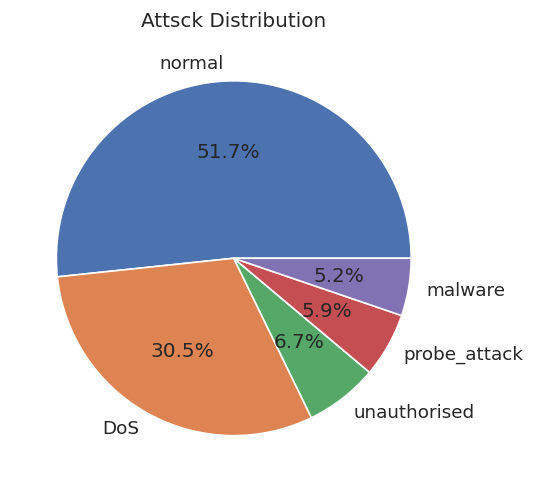

In [57]:
label_counts = KDD_Test_encoded['attack_group'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Attsck Distribution')
plt.show()

In [58]:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
le = LabelEncoder()
le.fit(KDD_Train_encoded['attack_group'])
# le.fit(KDD_Test_encoded['attack'])
KDD_Train_encoded['attack_group']=le.transform(KDD_Train_encoded['attack_group'])
# KDD_Test_encoded['attack']=le.transform(KDD_Test_encoded['attack'])
KDD_Train_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,15,2
1,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,19,0
2,0,http,SF,232,8153,0,0,0,0,0,...,0.03,0.01,0.00,0.01,1,0,0,normal,21,2
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1,0,0,normal,21,2
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,1,0,0,neptune,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,0
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,21,2
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.72,0.00,0.01,0.00,1,0,0,normal,18,2
125970,0,klogin,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,0


In [59]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}


In [19]:
le.fit(KDD_Test_encoded['attack_group'])
KDD_Test_encoded['attack_group']=le.transform(KDD_Test_encoded['attack_group'])
KDD_Test_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.00,1,0,0,neptune,21,0
1,2,ftp_data,SF,12983,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,1,0,0,normal,21,2
2,0,eco_i,SF,20,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0,0,1,saint,15,5
3,1,telnet,RSTO,0,15,0,0,0,0,0,...,0.00,0.0,0.83,0.71,1,0,0,mscan,11,5
4,0,http,SF,267,14515,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,smtp,SF,794,333,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
22539,0,http,SF,317,938,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
22540,0,http,SF,54540,8314,0,0,0,2,0,...,0.00,0.0,0.07,0.07,1,0,0,back,15,0
22541,0,domain_u,SF,42,42,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0,1,0,normal,21,2


#Attribute Analyses and Input selection

In [20]:
KDD_Train_encoded.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,0.032543,0.284455,0.278487,0.118832,0.120241,0.815165,0.119019,0.065816,19.504056,1.356889
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,0.112564,0.444785,0.445670,0.306559,0.319460,0.388165,0.323812,0.247962,2.291512,1.071175
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,2.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,4.000000


In [25]:
Train_numeric_cols = KDD_Train_encoded.select_dtypes(include=['number'])
Test_numeric_cols = KDD_Test_encoded.select_dtypes(include=['number'])
Train_numeric_cols

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,15,2
1,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,19,0
2,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,1,0,0,21,2
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,1,0,0,21,2
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,1.00,1.00,1,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,20,0
125968,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,21,2
125969,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,1,0,0,18,2
125970,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,20,0


In [26]:
from sklearn.feature_selection import mutual_info_classif

X = Train_numeric_cols.drop('attack_group', axis=1)
y = Train_numeric_cols['attack_group']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                 0.716840
diff_srv_rate             0.507391
same_srv_rate             0.471200
dst_bytes                 0.459973
dst_host_diff_srv_rate    0.451379
dst_host_srv_count        0.417089
count                     0.412660
dst_host_same_srv_rate    0.406313
dst_host_serror_rate      0.403416
serror_rate               0.387720
dtype: float64


In [29]:
int_corr = Train_numeric_cols[['src_bytes', 'diff_srv_rate', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'serror_rate', 'attack_group']]

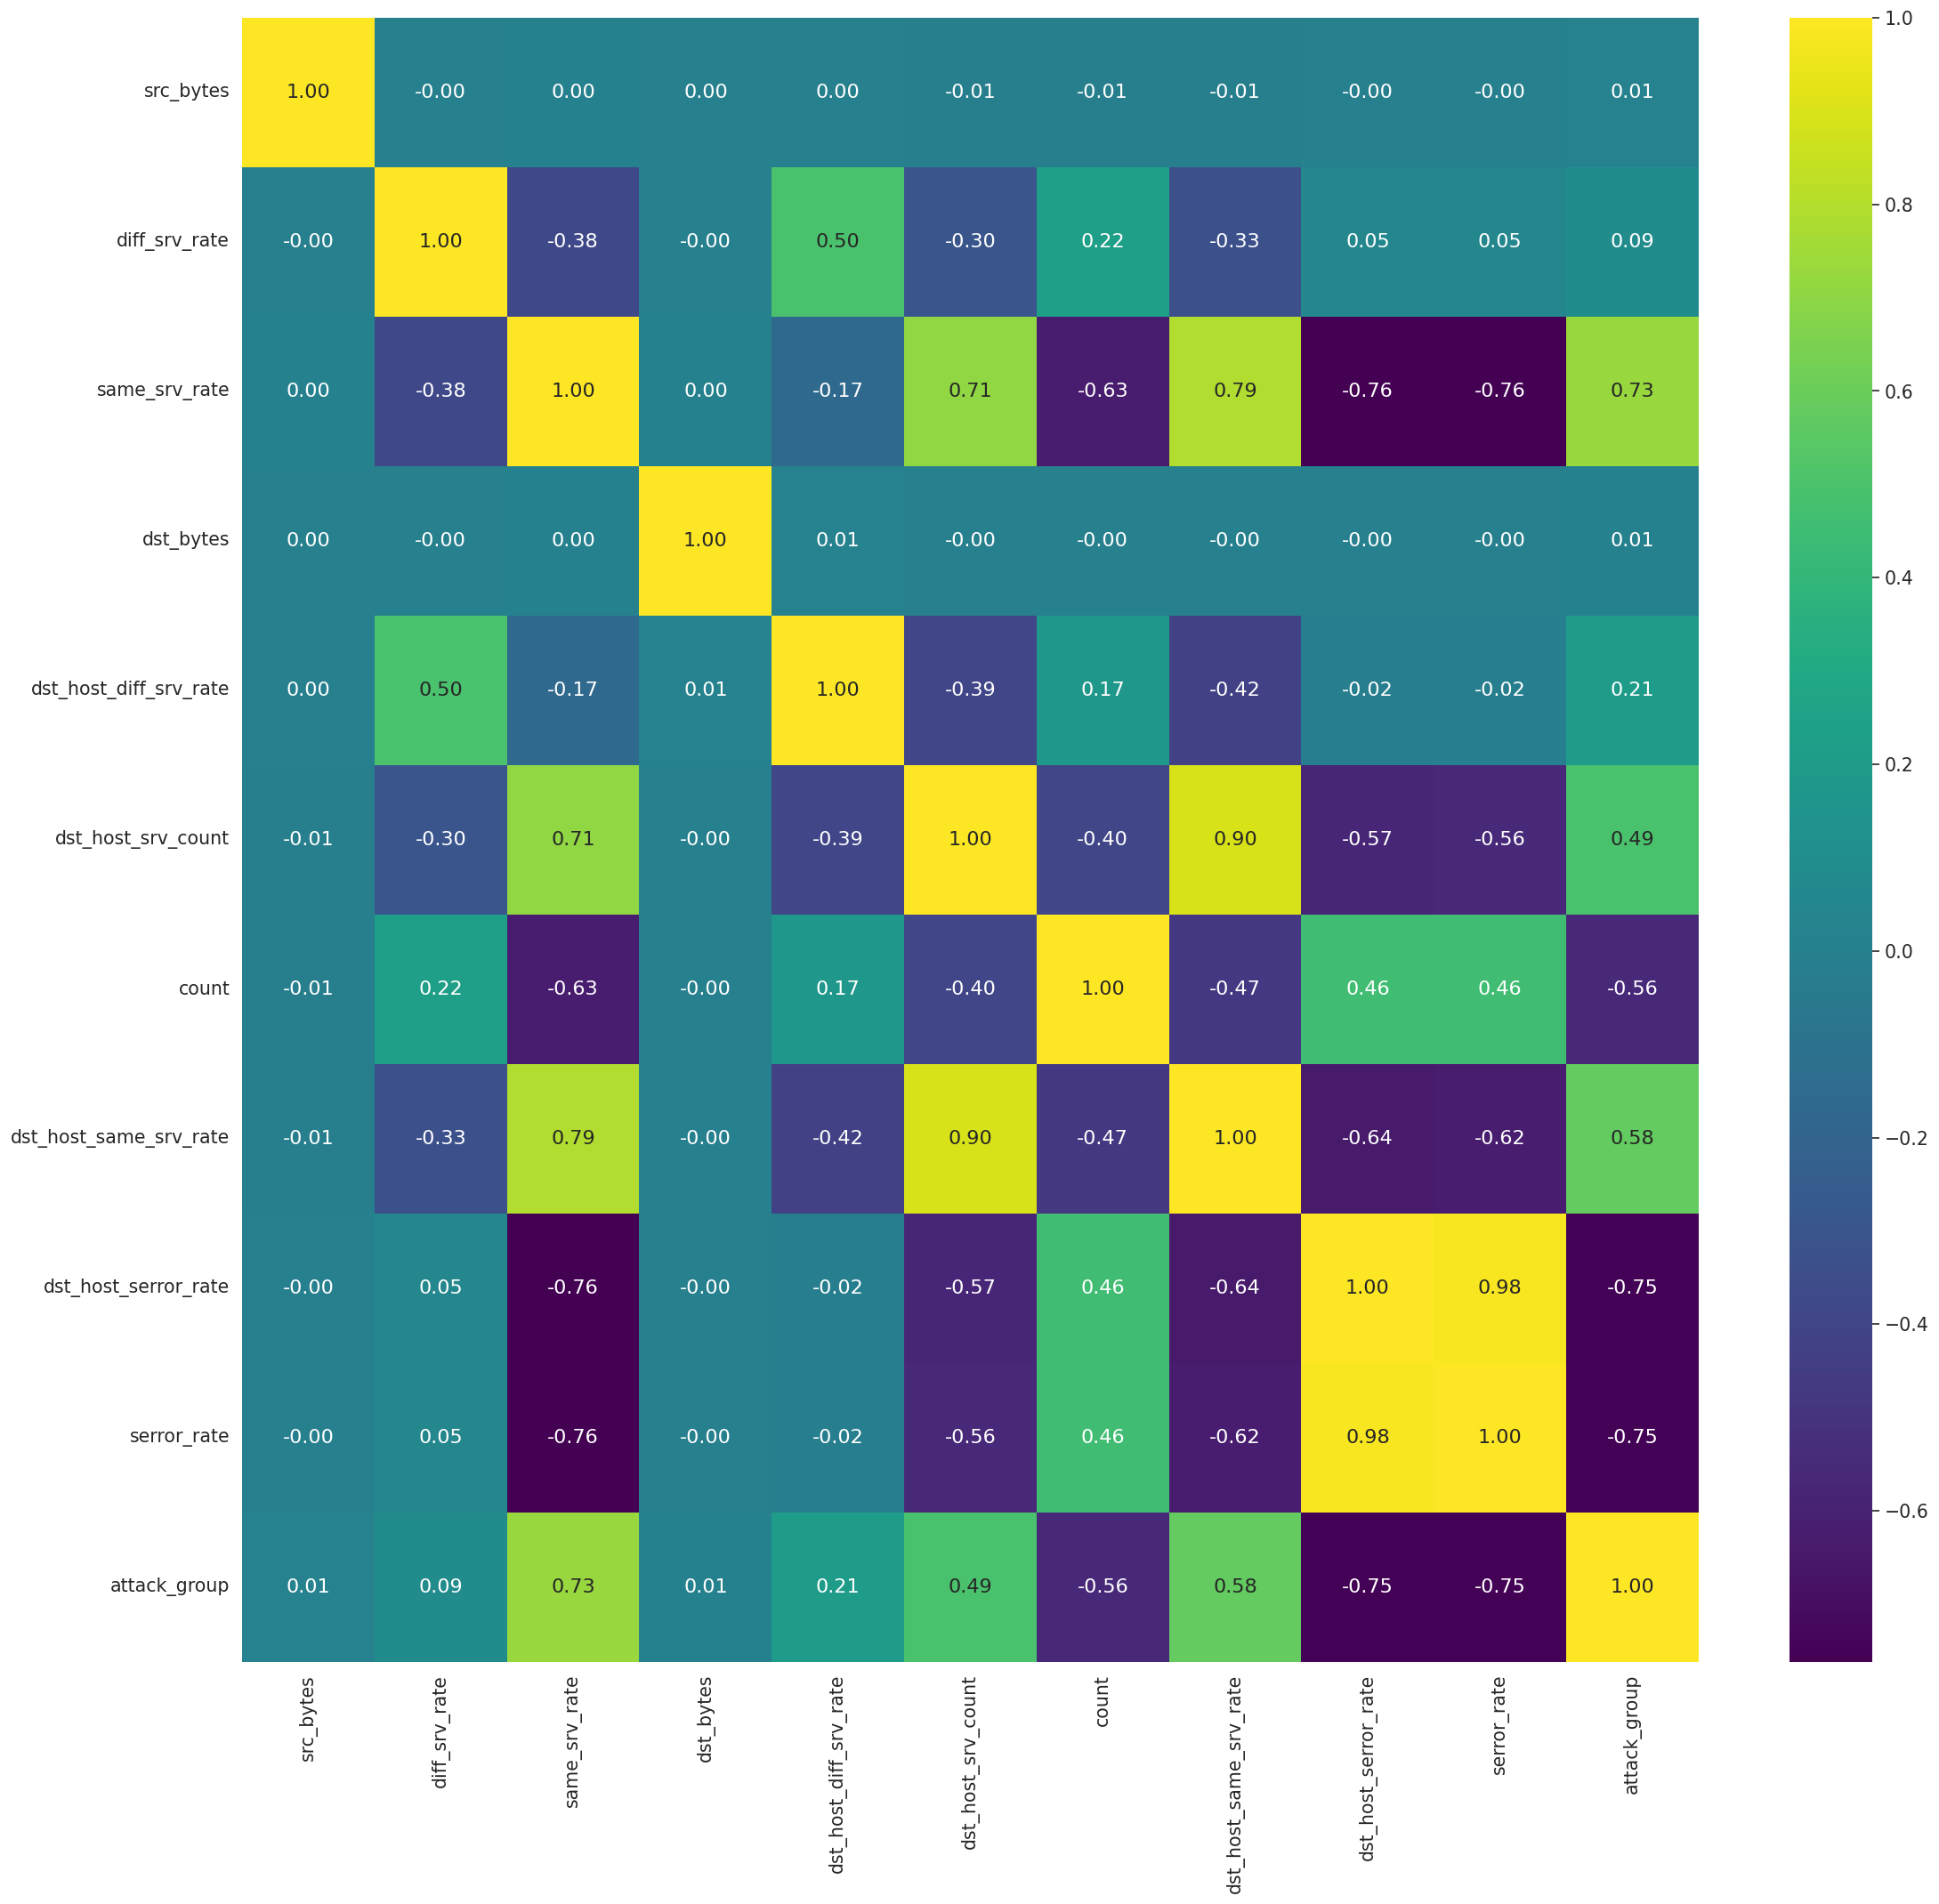

In [30]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# Splitting Data

# xgBoost - benchmark and GA Accuracy measure

In [40]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = Train_numeric_cols.drop(["attack_group"], axis=1)
y_base = Train_numeric_cols["attack_group"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)
X_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level
0,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,1,0,15
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,19
2,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,0,0,21
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,21
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,20
125968,8,105,145,0,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0,1,0,21
125969,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.00,0.72,0.00,0.01,0.00,1,0,0,18
125970,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,20


In [41]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [42]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level
98347,0,316,893,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,1,0,0,21
117445,0,42,42,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0,1,0,21
98753,0,223,1415,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,1,0,0,21
114378,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,0,0,18
105134,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110858,0,324,44823,0,0,0,0,0,1,0,...,0.04,0.03,0.04,0.01,0.0,0.0,1,0,0,21
75141,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,0,0,21
114568,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.0,1,0,0,21
67212,0,232,2395,0,0,0,0,0,1,0,...,1.00,0.06,0.00,0.00,0.0,0.0,1,0,0,21


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [44]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [45]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9996883146322113


In [46]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9975683380715878


In [47]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9984543193853078


In [48]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9980106448870487


{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}

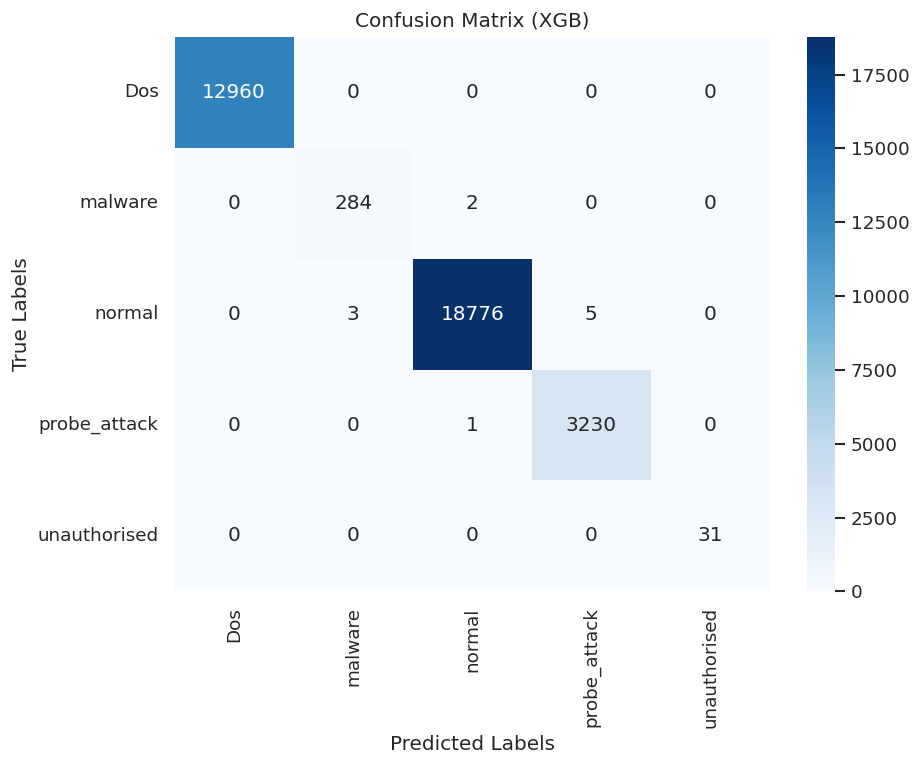

In [60]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Dos", "malware", "normal", "probe_attack", "unauthorised"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

In [63]:
y_test_base

98347     2
117445    2
98753     2
114378    0
105134    0
         ..
110858    2
75141     0
114568    0
67212     2
72503     2
Name: attack_group, Length: 35292, dtype: int64

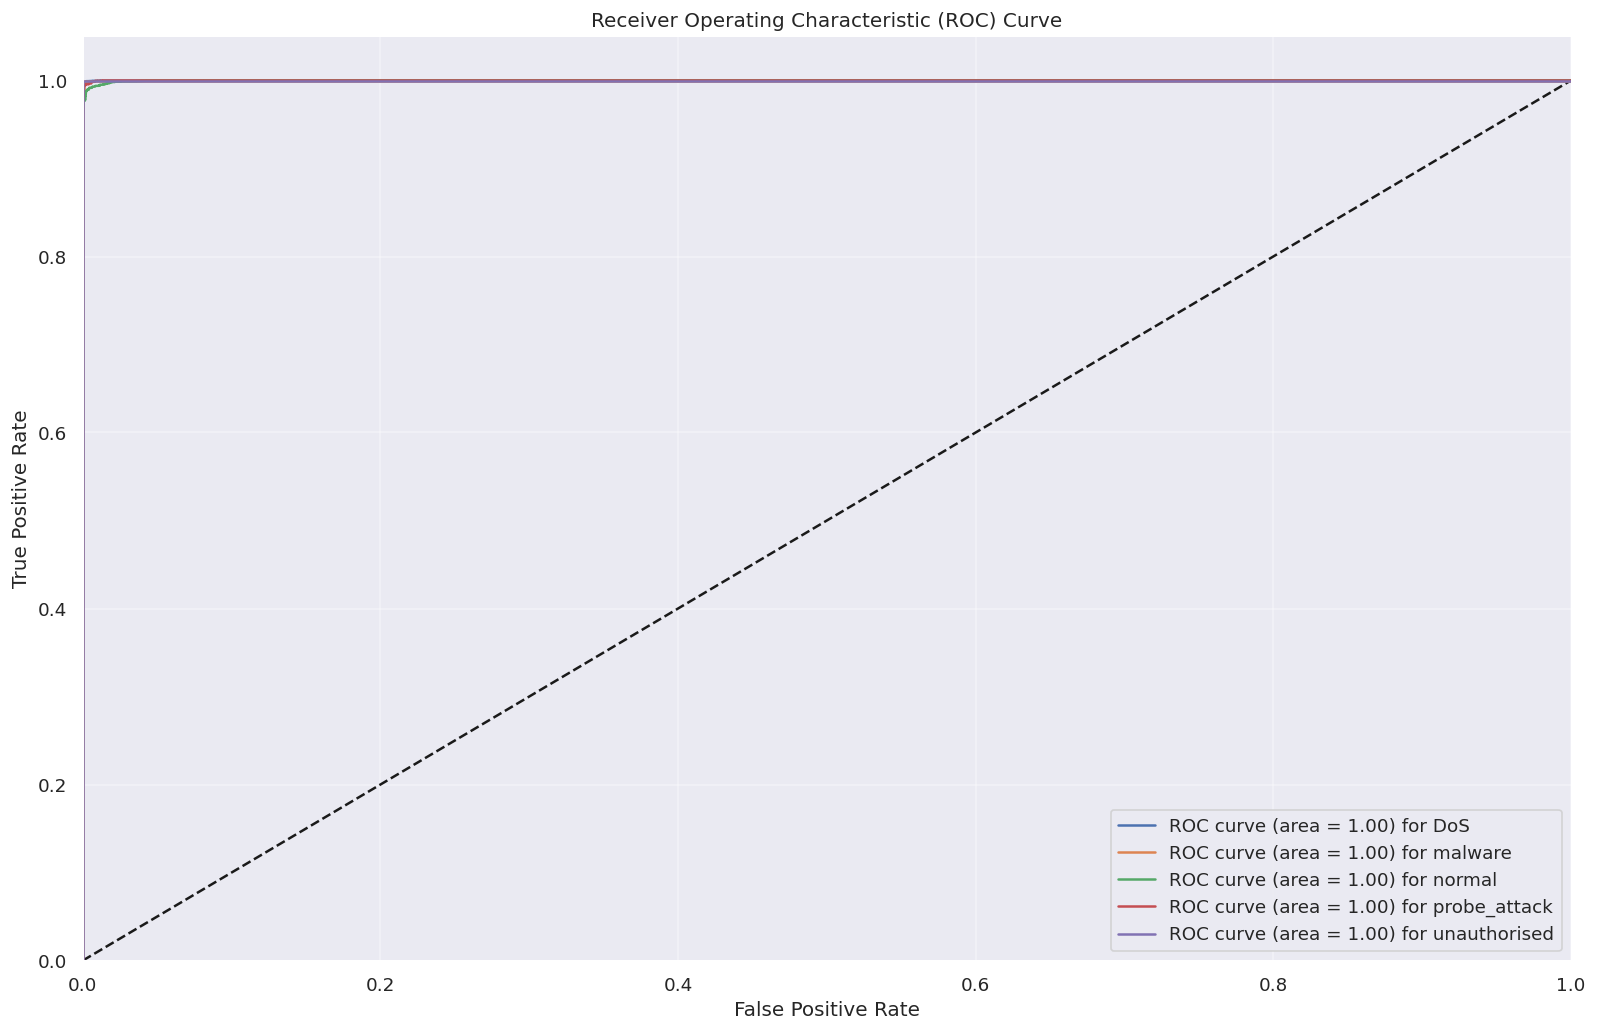

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_multiclass_roc(clf, X_test_base, y_test_base, n_classes, class_labels, figsize=(17, 6)):
    y_score = clf.decision_function(X_test_base)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test_base, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Define the class labels according to the specified array
class_labels = ['DoS', 'malware', 'normal', 'probe_attack', 'unauthorised']

# Call the function with the modified class_labels array
plot_multiclass_roc(xgBoostClassifier, X_test_base, y_test_base, n_classes=5, class_labels=class_labels, figsize=(16, 10))


## Measuring performance on small unseen set

In [79]:
solution_validate = xgBoostClassifier.predict(futureSample_X_base)

In [80]:
score_validate = accuracy_score(futureSample_y_base, solution_validate)
print (score_validate)

0.9968


## Measuring performance on Test Set

In [81]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_T = Test_numeric_cols.drop(["attack_group"], axis=1)
y_T = Test_numeric_cols["attack_group"]

In [82]:
test_val = xgBoostClassifier.predict(X_T)

In [83]:
score_test = accuracy_score(y_T, test_val)
print (score_test)

0.73082553342501


# Genetic Algorithm - Feature Selection (Using Models)

Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [ ]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [ ]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [ ]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
z = X_base.shape[1]
z

38

In [ ]:
logmodel = xgBoostClassifier
chromo_df_bc, score_bc = generations(X_base,y_base,size=80, n_feat=X_base.shape[1], n_parents=64,
                                  mutation_rate=0.20,n_gen=5, X_train = X_train_base,
                                  X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

In [ ]:
len(int_data_no_strings.columns)

39

In [ ]:
# selected_features = X_base.columns[chromo_df_bc[4]]
# print(selected_features.tolist())

In [ ]:
# len(selected_features.tolist())

# Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,logged_in,num_compromised,root_shell,num_root,num_file_creations,...,num_access_files,count,serror_rate,rerror_rate,same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,...,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.424357e-17,1.410255e-19,-5.641019e-19,-1.579485e-17,3.878200e-19,4.371790e-17,8.955117e-18,-1.191665e-17,9.589732e-18,6.205121e-18,...,2.185895e-17,8.017298e-17,7.862170e-18,1.523075e-17,-1.452562e-17,1.635895e-17,6.176916e-17,-6.924351e-17,-1.231505e-16,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.289642e-01,-6.401420e-01,-3.721856e-01,-1.502538e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
25%,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.202436e-01,-6.401420e-01,-3.721856e-01,-1.297820e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
50%,-1.135507e-01,-1.007427e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-6.155966e-01,-6.401420e-01,-3.721856e-01,7.721087e-01,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
75%,-1.135507e-01,-9.976793e-03,-3.334045e-02,-9.122318e-02,-6.300533e-03,1.238197e+00,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,5.180798e-01,1.595477e+00,-3.721856e-01,7.721087e-01,-2.836056e-01,-1.071171e-01,1.603834e+00,1.614454e+00,1.000000
max,1.584102e+01,1.583257e+02,5.795287e+01,1.143768e+01,1.587167e+02,1.238197e+00,8.483823e+01,2.539584e+01,8.475636e+01,7.550206e+01,...,8.115620e+01,3.718535e+00,1.595477e+00,2.765176e+00,7.721087e-01,2.764775e+00,8.755824e+00,1.603834e+00,1.614454e+00,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [ ]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.9624357453538949


In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9642995739438427


In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9610697028723381


In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.9622040711149622


In [ ]:
X_test.shape

(5058, 20)

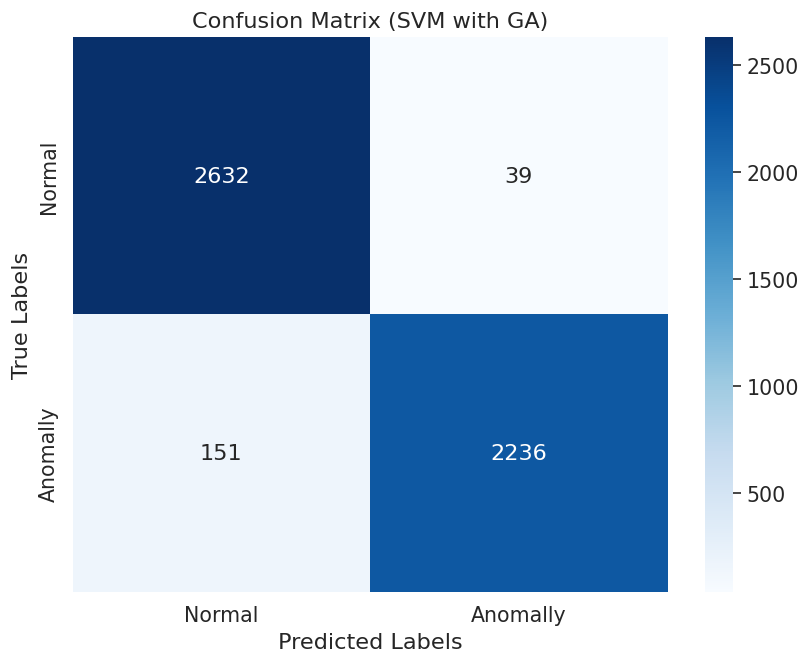

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2671
           1       0.98      0.94      0.96      2387

    accuracy                           0.96      5058
   macro avg       0.96      0.96      0.96      5058
weighted avg       0.96      0.96      0.96      5058



## ROC Curve

The AUC is 0.987


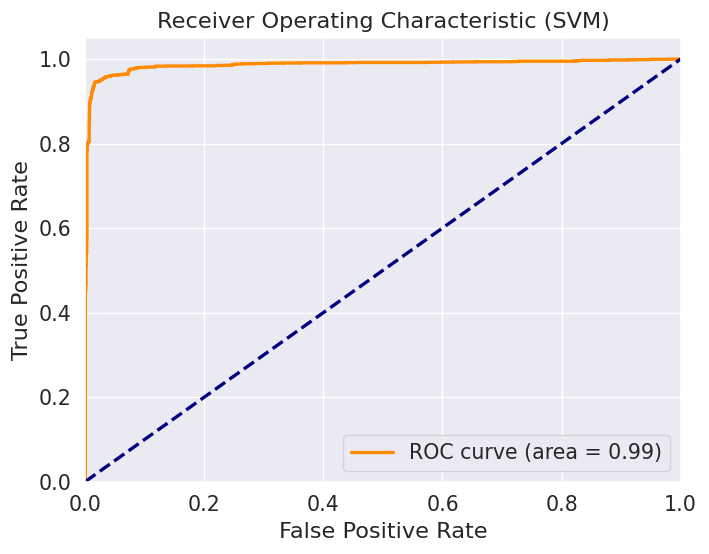

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

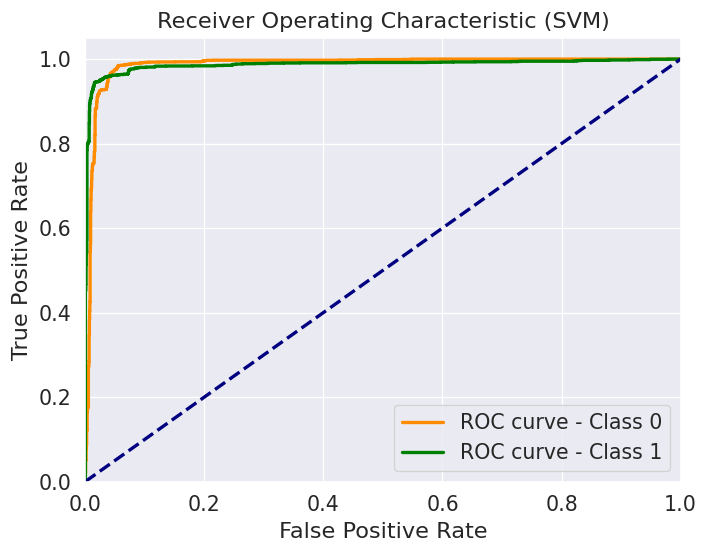

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9664


#Naive Bayes

## Splitting Data

In [ ]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

class_label
0    9374
1    8260
Name: count, dtype: int64

## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

0.8745583038869258


In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

0.8802930546970151


In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

0.869559051667835


In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

0.8723350421223264


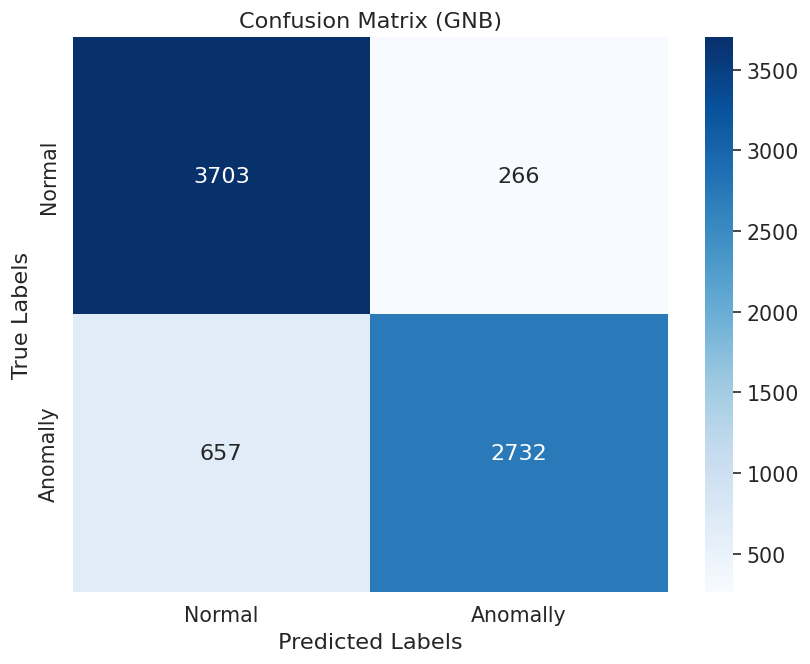

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3969
           1       0.91      0.81      0.86      3389

    accuracy                           0.87      7358
   macro avg       0.88      0.87      0.87      7358
weighted avg       0.88      0.87      0.87      7358



## ROC Curve

The AUC is 0.952
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.629 vs 0.015
1.000	0.629 vs 0.015
1.000	0.630 vs 0.015
1.000	0.630 vs 0.015
1.000	0.631 vs 0.015
1.000	0.632 vs 0.015
1.000	0.632 vs 0.015
1.000	0.632 vs 0.016
1.000	0.633 vs 0.016
1.000	0.633 vs 0.016
1.000	0.633 vs 0.016
1.000	0.633 vs 0.017
1.000	0.634 vs 0.017
1.000	0.634 vs 0.018
1.000	0.634 vs 0.018
1.000	0.634 vs 0.018
1.000	0.635 vs 0.018
1.000	0.635 vs 0.018
1.000	0.637 vs 0.018
1.000	0.637 vs 0.018
1.000	0.637 vs 0.018
1.000	0.637 vs 0.019
1.000	0.638 vs 0.019
1.000	0.638 vs 0.019
1.000	0.638 vs 0.019
1.000	0.638 vs 0.019
1.000	0.638 vs 0.019
1.000	0.638 vs 0.020
1.000	0.640 vs 0.020
1.000	0.640 vs 0.020
1.000	0.641 vs 0.020
1.000	0.641 vs 0.020
1.000	0.642 vs 0.020
1.000	0.642 vs 0.021
1.000	0.642 vs 0.021
1.000	0.642 vs 0.021
1.000	0.644 vs 0.021
1.000	0.644 vs 0.022
1.000	0.644 vs 0.022
1.000	0.644 vs 0.022
1.000	0.644 vs 0.022
1.000	0.644 vs 0.022
1.000	0.645 vs 0.022
1.000	0.645 vs 0.022
1.000	0.645 vs 0.

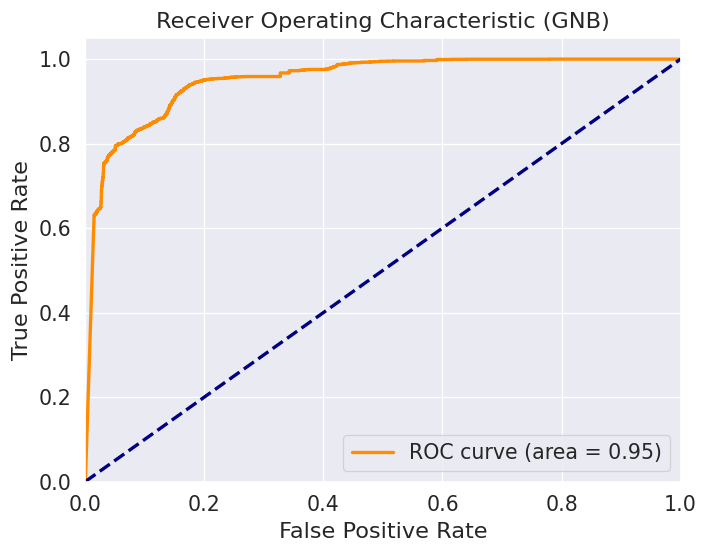

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

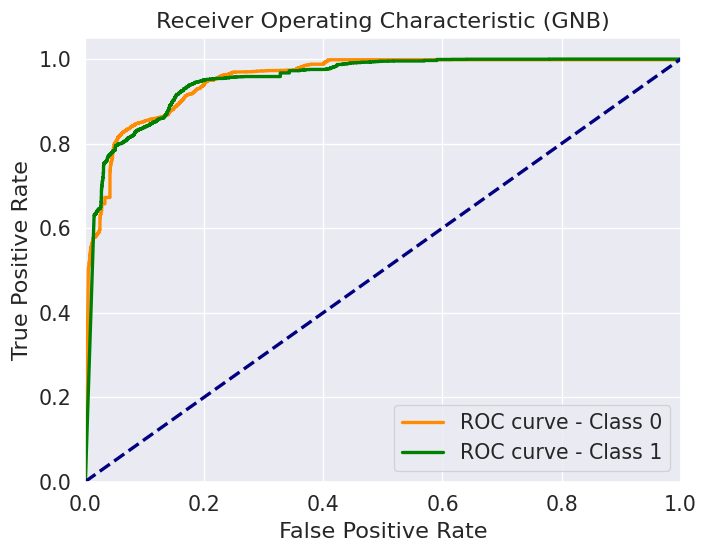

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.855


# Decision Tree

## Splitting Data

In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
futureSample_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
4287,0,0,0,0,0,0,0,0,0,0,...,255,11,0.04,0.06,0.00,0.00,1.00,1.00,0.00,0.0
9506,0,46,46,0,0,0,0,0,0,0,...,255,203,0.80,0.01,0.01,0.00,0.00,0.00,0.00,0.0
4680,3030,17,17,0,0,0,0,0,0,0,...,255,220,0.86,0.01,0.05,0.00,0.00,0.00,0.00,0.0
11842,4,105,1479,0,0,0,0,0,1,0,...,3,1,0.33,0.67,0.33,0.00,0.00,0.00,0.00,0.0
22604,0,0,0,0,0,0,0,0,0,0,...,65,2,0.02,1.00,0.02,1.00,0.00,0.00,0.92,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21828,0,250,270,0,0,0,0,0,1,0,...,255,237,0.93,0.02,0.00,0.00,0.01,0.01,0.00,0.0
14657,0,346,1185,0,0,0,0,0,1,0,...,10,255,1.00,0.00,0.10,0.05,0.00,0.00,0.00,0.0
13877,0,0,0,0,0,0,0,0,0,0,...,255,14,0.05,0.07,0.00,0.00,1.00,1.00,0.00,0.0
8610,0,311,2271,0,0,0,0,0,1,0,...,15,255,1.00,0.00,0.07,0.04,0.00,0.00,0.00,0.0


In [ ]:
y_train.value_counts()

class_label
0    9436
1    8198
Name: count, dtype: int64

## Train Decision Tree

In [ ]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100,
                       min_samples_split=300)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.9776591538157374


In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.9771485894379609


In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.9782300494727347


In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.9775889959230726


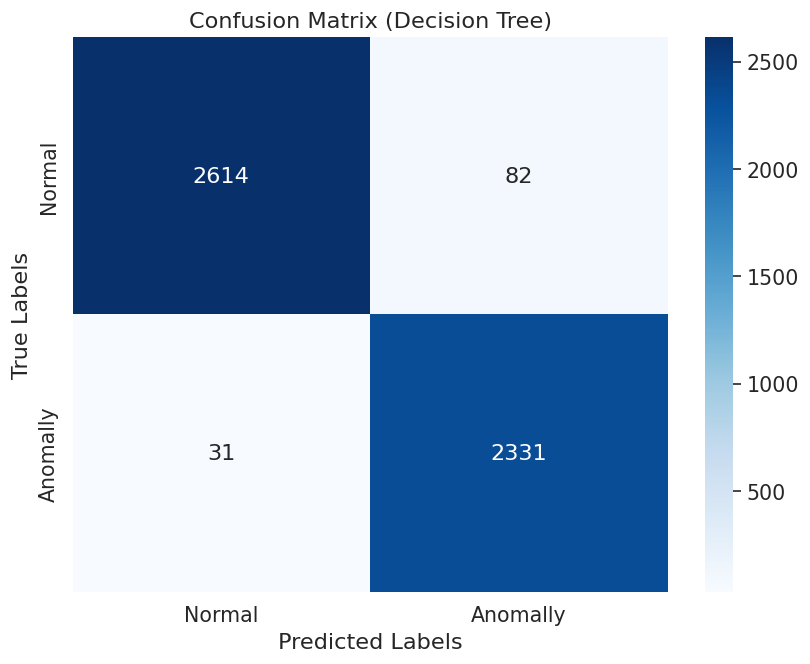

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2696
           1       0.97      0.99      0.98      2362

    accuracy                           0.98      5058
   macro avg       0.98      0.98      0.98      5058
weighted avg       0.98      0.98      0.98      5058



## ROC Curve

The AUC is 0.998
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.843 vs 0.000
0.990	0.859 vs 0.000
0.985	0.892 vs 0.000
0.978	0.909 vs 0.001
0.792	0.918 vs 0.002
0.767	0.930 vs 0.007
0.695	0.939 vs 0.011
0.665	0.956 vs 0.018
0.662	0.976 vs 0.026
0.636	0.987 vs 0.030
0.327	0.991 vs 0.035
0.115	0.993 vs 0.049
0.096	0.997 vs 0.066
0.080	0.997 vs 0.079
0.059	0.998 vs 0.100
0.050	0.999 vs 0.111
0.030	0.999 vs 0.124
0.026	0.999 vs 0.145
0.019	0.999 vs 0.156
0.010	0.999 vs 0.168
0.000	1.000 vs 1.000


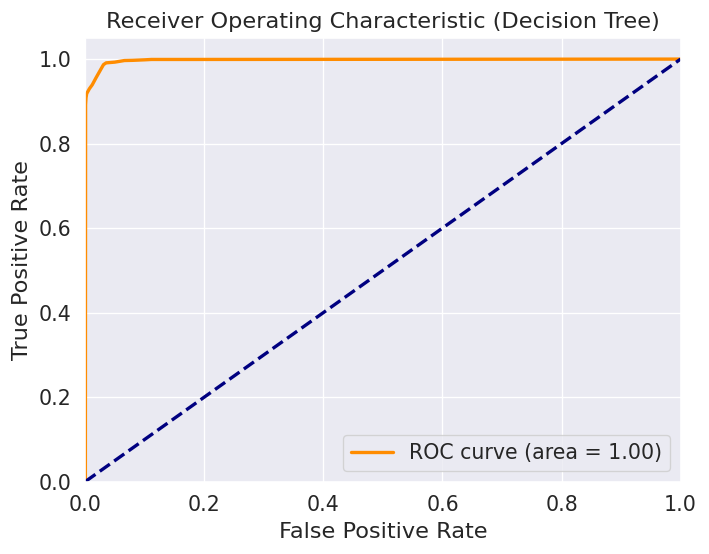

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

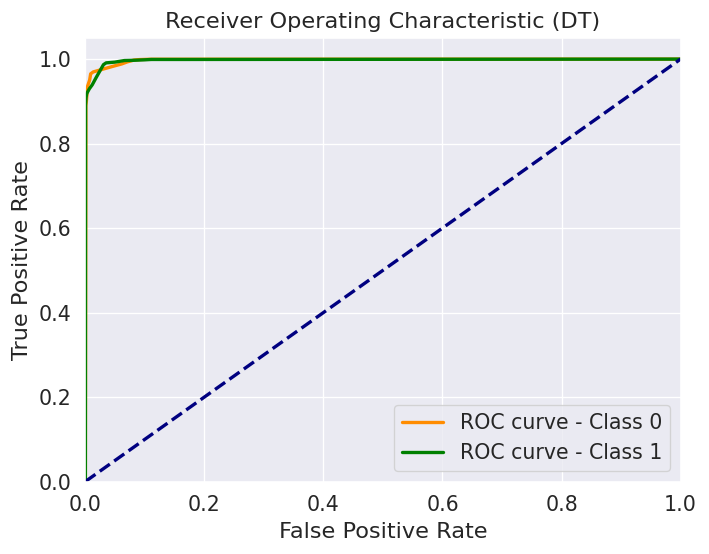

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.98


# Random Forrest

##Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

class_label
0    9390
1    8244
Name: count, dtype: int64

## Train Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=30, max_features=0.2, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200, oob_score=True,
                       random_state=42)

## Measure Random Forrest's performance

In [ ]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
8475,0,0,0,0,0,0,0,0,0,0,...,255,16,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0
20547,0,0,0,0,0,0,0,0,0,0,...,255,4,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0
9860,0,8,0,0,0,0,0,0,0,0,...,1,81,1.00,0.00,1.00,0.51,0.0,0.0,0.0,0.0
19270,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0
14746,0,0,0,0,0,0,0,0,0,0,...,255,11,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,0,0,0,0,0,0,0,0,0,0,...,255,18,0.07,0.08,0.00,0.00,1.0,1.0,0.0,0.0
14015,0,0,0,0,0,0,0,0,0,0,...,255,6,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0
8272,17025,1,0,0,0,0,0,0,0,0,...,255,2,0.01,0.71,1.00,0.00,0.0,0.0,1.0,1.0
22392,0,78,0,0,0,0,0,0,0,0,...,255,30,0.12,0.01,0.12,0.00,0.0,0.0,0.0,0.0


In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

0.9873606958412612


In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

0.9879039881925107


In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

0.9867532527737429


In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

0.9872763730439483


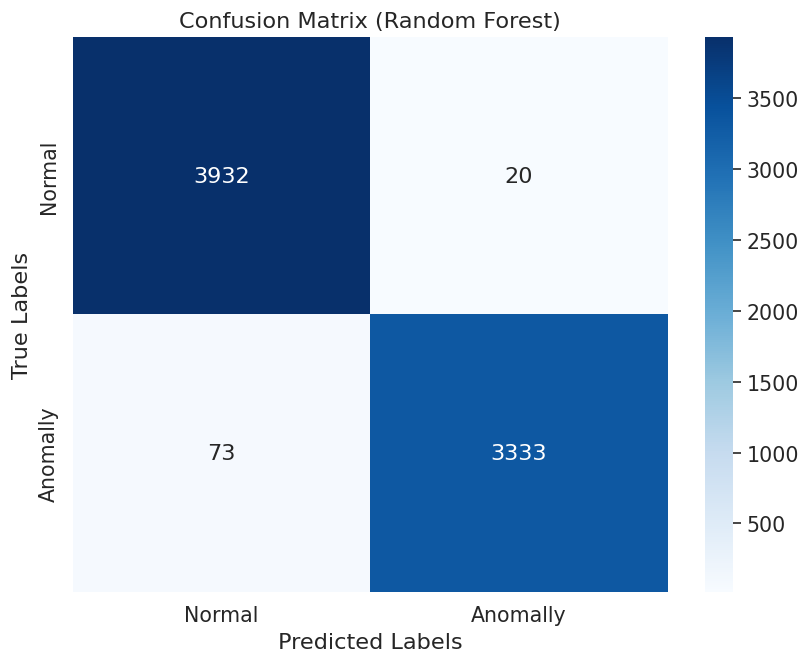

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3952
           1       0.99      0.98      0.99      3406

    accuracy                           0.99      7358
   macro avg       0.99      0.99      0.99      7358
weighted avg       0.99      0.99      0.99      7358



## ROC Curve

The AUC is 0.999
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.001 vs 0.000
1.000	0.062 vs 0.000
1.000	0.063 vs 0.000
1.000	0.187 vs 0.000
1.000	0.191 vs 0.000
1.000	0.193 vs 0.000
1.000	0.201 vs 0.000
1.000	0.210 vs 0.000
1.000	0.211 vs 0.000
1.000	0.215 vs 0.000
1.000	0.217 vs 0.000
1.000	0.226 vs 0.000
1.000	0.228 vs 0.000
1.000	0.231 vs 0.000
1.000	0.236 vs 0.000
1.000	0.248 vs 0.000
1.000	0.249 vs 0.000
1.000	0.250 vs 0.000
1.000	0.252 vs 0.000
1.000	0.257 vs 0.000
1.000	0.258 vs 0.000
1.000	0.258 vs 0.000
1.000	0.305 vs 0.000
1.000	0.305 vs 0.000
1.000	0.307 vs 0.000
1.000	0.307 vs 0.000
1.000	0.319 vs 0.000
1.000	0.320 vs 0.000
1.000	0.324 vs 0.000
1.000	0.325 vs 0.000
1.000	0.326 vs 0.000
1.000	0.327 vs 0.000
1.000	0.327 vs 0.000
1.000	0.328 vs 0.000
1.000	0.330 vs 0.000
1.000	0.331 vs 0.000
1.000	0.332 vs 0.000
1.000	0.332 vs 0.000
1.000	0.334 vs 0.000
1.000	0.336 vs 0.000
1.000	0.338 vs 0.000
1.000	0.339 vs 0.000
1.000	0.339 vs 0.000
1.000	0.341 vs 0.000
1.000	0.341 vs 0.

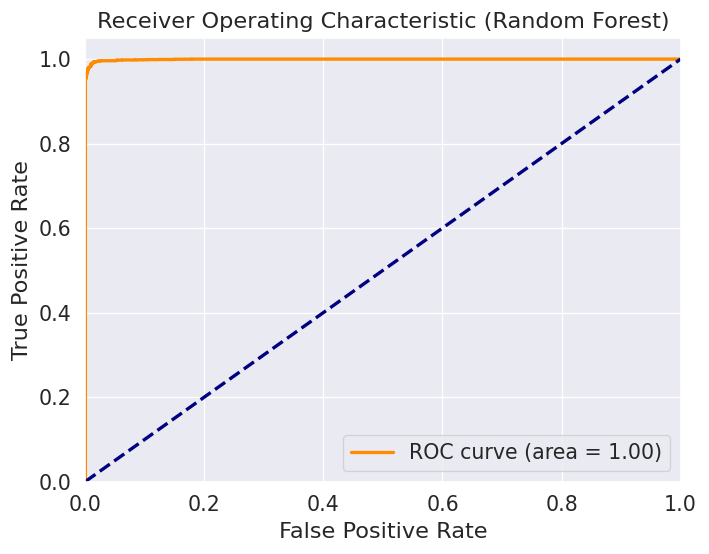

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

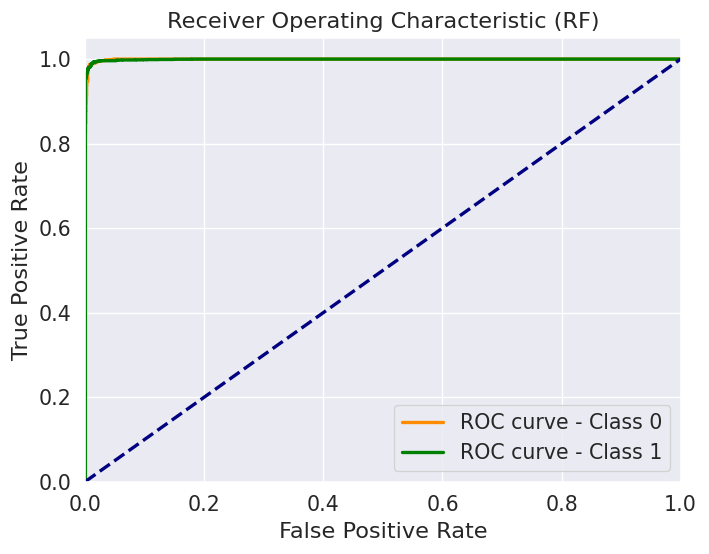

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.985


# Basic Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 3), max_iter=1000,
              random_state=101, solver='lbfgs')

## Measure Basic Neural Network performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

0.9654670547763958


In [ ]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

0.9692170835773828


In [ ]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

0.9629402339146454


In [ ]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

0.9650807002468113


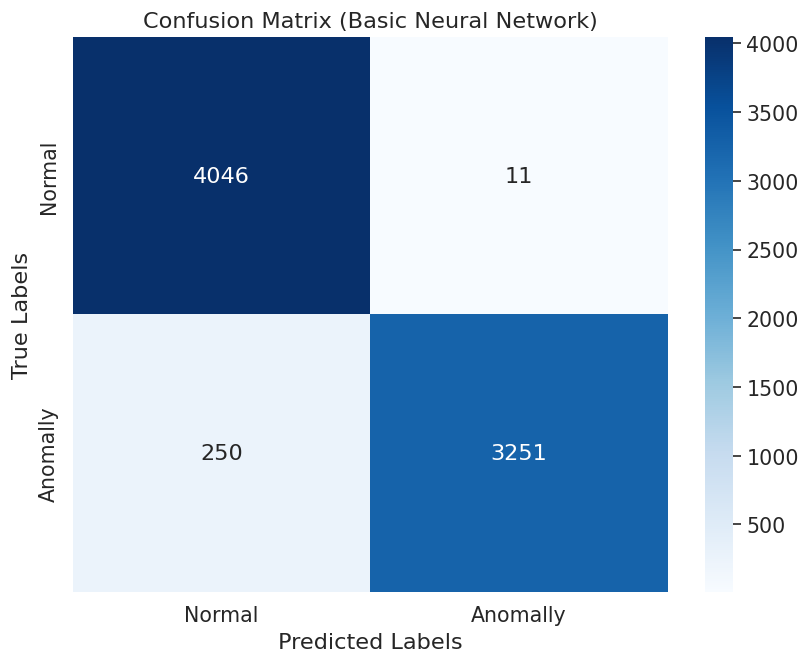

In [ ]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_NN)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4057
           1       1.00      0.93      0.96      3501

    accuracy                           0.97      7558
   macro avg       0.97      0.96      0.97      7558
weighted avg       0.97      0.97      0.97      7558



## ROC Curve

The AUC is 0.964


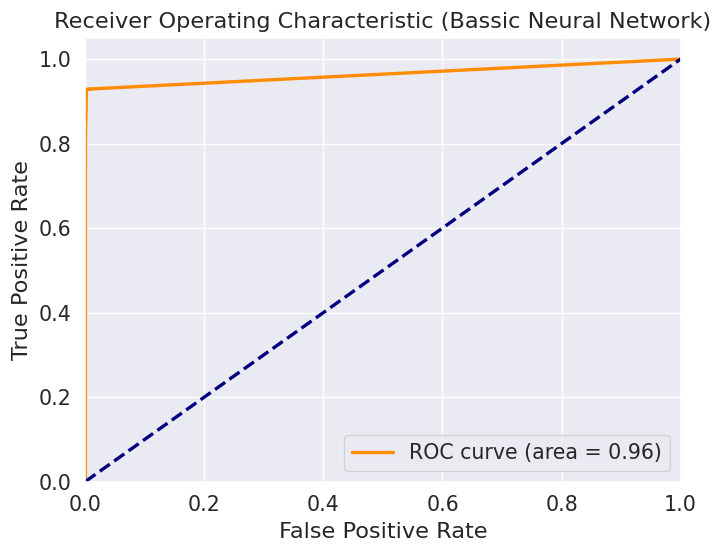

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bassic Neural Network)')
plt.legend(loc="lower right")
plt.show()

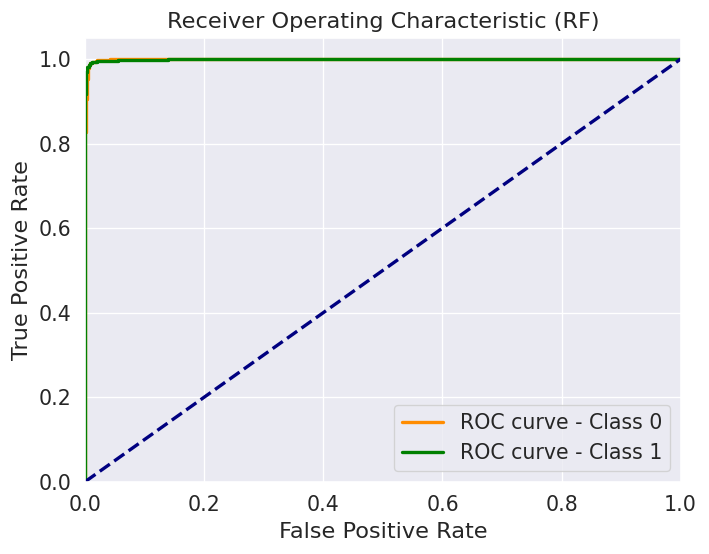

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()